In [1]:
!wget https://www.dropbox.com/s/xg78kiae02d4u8f/Conan.jpg --no-check-certificate

--2021-11-09 10:00:49--  https://www.dropbox.com/s/xg78kiae02d4u8f/Conan.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xg78kiae02d4u8f/Conan.jpg [following]
--2021-11-09 10:00:50--  https://www.dropbox.com/s/raw/xg78kiae02d4u8f/Conan.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd9a16dc296cbe75300d9c61599.dl.dropboxusercontent.com/cd/0/inline/BZr15YNrOyU4Hd0izwJvPaVxoMbJ5PfsoLW7oox3m92rDgDDVOxR344joQwkSrdyqqpcpYqzp9VZU-56tWiTLgsGUvLMWHcBLAhRWKe9aO9uD3cI8SC_DSO2q_7pVi8cmx40MfT3Q2BoZmW93qunPzNf/file# [following]
--2021-11-09 10:00:50--  https://ucd9a16dc296cbe75300d9c61599.dl.dropboxusercontent.com/cd/0/inline/BZr15YNrOyU4Hd0izwJvPaVxoMbJ5PfsoLW7oox3m92rDgDDVOxR344joQwkSrdyqqpcpYqzp9VZU-56tWiTLgsGUvLMWHcBLAh

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "Conan.jpg"
}

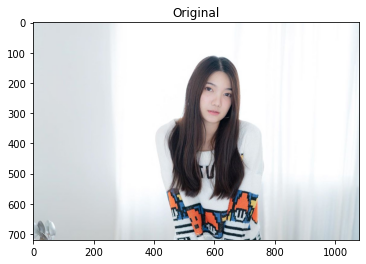

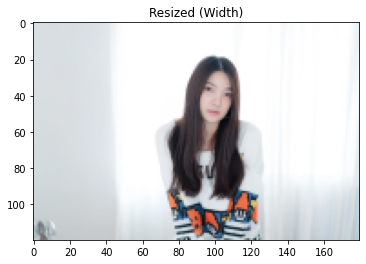

In [12]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 180.0 / image.shape[1]
dim = (180, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

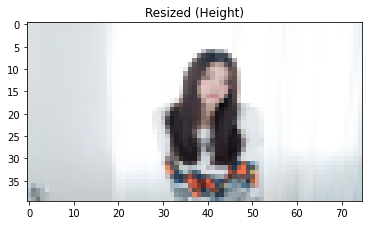

In [10]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 40)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

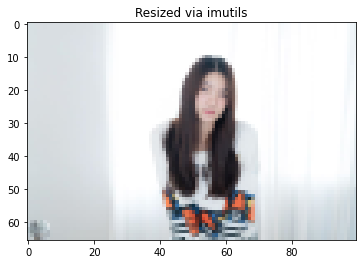

In [7]:
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


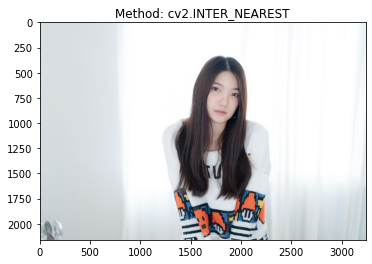

[INFO] cv2.INTER_LINEAR


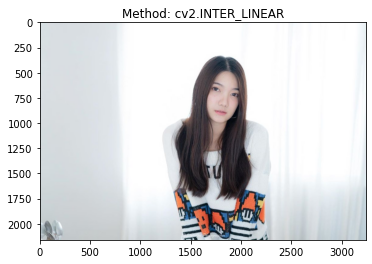

[INFO] cv2.INTER_AREA


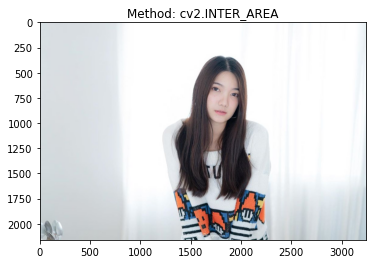

[INFO] cv2.INTER_CUBIC


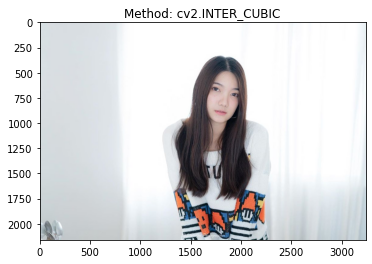

[INFO] cv2.INTER_LANCZOS4


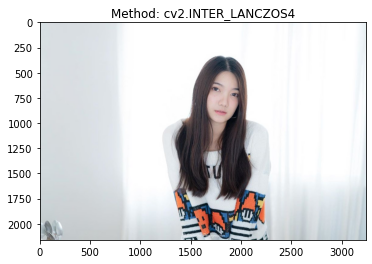

In [8]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)